# INF-616 - Exercício teste estatístico

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

In [1]:
import os

import numpy as np
from scipy import stats

from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

import matplotlib
from matplotlib import pyplot

%matplotlib inline

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

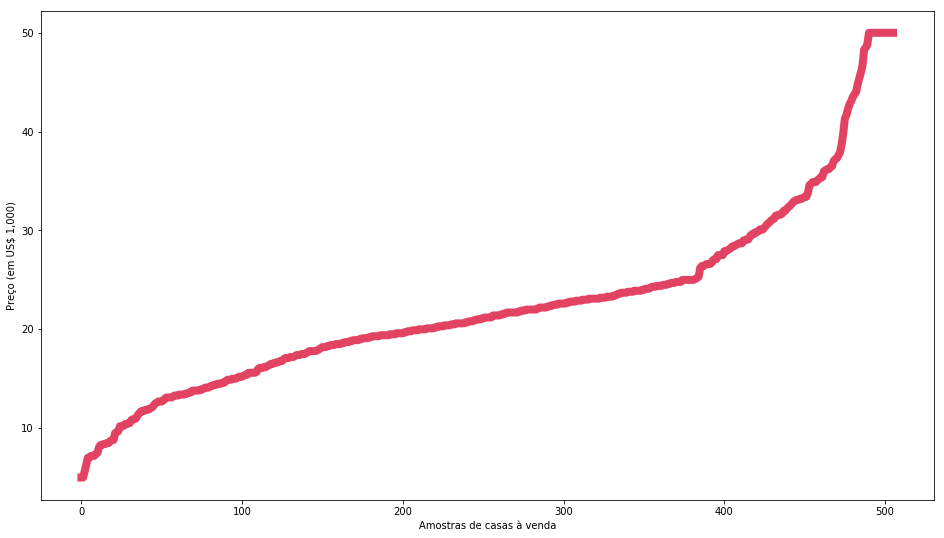

In [2]:
d = datasets.load_boston()
print(d.DESCR)

pyplot.figure(figsize=(16, 9))
pyplot.plot(range(len(d.target)), sorted(d.target),
            linewidth=8, color='crimson', alpha=.8)
_ = pyplot.xlabel('Amostras de casas à venda')
_ = pyplot.ylabel('Preço (em US$ 1,000)')

In [9]:
r = np.random.RandomState(42)

experiments = 5
estimators = [
    SVR(kernel='linear'),
    LinearRegression()
]

# scoring = erro absoluto médio (MAE) original.
scoring = metrics.make_scorer(metrics.mean_absolute_error,
                              greater_is_better=True)
scores = []

for experiment in range(experiments):
    print('Executando experimento #%i' % experiment)
    experiment_seed = r.randint(100)

    # Compartilha o KFold entre os estimadores,
    # garantindo que ambos sejam executados sobre as mesmas folds.
    skf = KFold(n_splits=2,
                shuffle=True,
                random_state=experiment_seed)
    exp_scores = []
    
    for e in estimators:
        print('- Testando', e)
        score = cross_val_score(e, d.data, d.target, cv=skf, n_jobs=4, scoring=scoring)
        exp_scores += [score]
        print('  pontuação nos folds:', score, end='\n\n')

    scores += [exp_scores]
    print()

scores = np.asarray(scores)


Executando experimento #0
- Testando SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
  pontuação nos folds: [3.18681219 3.35652385]

- Testando LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
  pontuação nos folds: [3.42504058 3.51393561]


Executando experimento #1
- Testando SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
  pontuação nos folds: [3.17753803 3.44310437]

- Testando LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
  pontuação nos folds: [3.71332347 3.47068855]


Executando experimento #2
- Testando SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
  pontuação nos folds: [3.24776933 3.23446521]

- Testando LinearRegress

**Dado os resultados obtidos acima, determine qual dos estimadores possui maior pontuação e execute um teste estatístico a fim de rejeitar a hipótese nula.**

**Atenção:** a pontuação em um problema de regressão nem sempre é definida por uma métrica onde o "melhor resultado" é o maior número.

In [ ]:
score_by_class = scores.transpose([1,0,2]).reshape(2,-1)
mean_score_by_class = score_by_class.mean(axis=(1,))
print(score_by_class)
print(mean_score_by_class)

best_estimator_index  = np.argmin(mean_score_by_class)
print(f'Em média, o estimador {estimators[best_estimator_index].__class__.__name__} obteve uma melhor pontuação:')
for estimator, mean_score in zip(estimators, mean_score_by_class):
    print(f'- {estimator.__class__.__name__} = {mean_score}')

In [31]:
s, p = stats.wilcoxon(score_by_class[0], score_by_class[1])

# `p` representa a probabilidade de que a diferença de 
# pontuação observada tenha ocorrido ao acaso.
if p < 0.05:
    print('A diferença em pontuação é significativa (p-valor: %s < 5%%)!' % p)
else:
    print('Entretanto, a diferença em pontuação não é '
          'significativa (p-valor: %s >= 5%%).' % p)

A diferença em pontuação é significativa (p-valor: 0.005062032126267864 < 5%)!
